In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) 
    if isinstance(skill_list, str) else skill_list)

c:\Users\DeLL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
df_DA_Ind = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()
df_DA_Ind = df_DA_Ind.dropna(subset=['salary_year_avg'])

11412      50400.0
27487     165000.0
29583     119250.0
32890     105000.0
41257      57500.0
            ...   
774606     79200.0
774809    102500.0
777313    111202.0
784033    111175.0
785515    105000.0
Name: salary_year_avg, Length: 94, dtype: float64

Text(0, 0.5, 'No. of jobs')

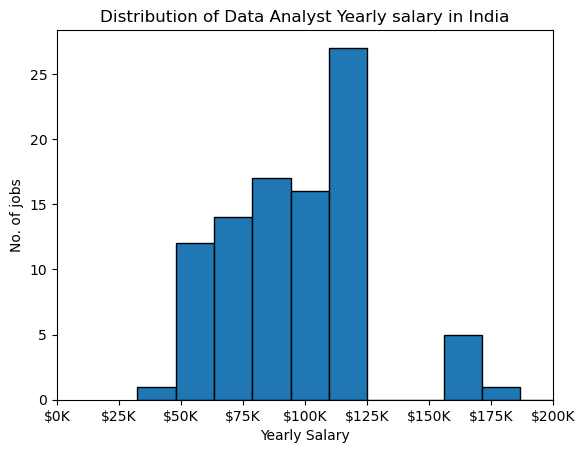

In [36]:
df_DA_Ind['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0,200000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos : f"${int(x/1000)}K"))
plt.title('Distribution of Data Analyst Yearly salary in India')
plt.xlabel('Yearly Salary')
plt.ylabel('No. of jobs')